# 1. Creating an RDD from a File or Files

Spark cung cấp các phương thức API để tạo RDD từ một tệp, các tệp hoặc nội dung của một thư mục.

Các tệp có thể có nhiều định dạng khác nhau: không cấu trúc, bán cấu trúc (JSON,…),  cấu trúc  (CSV,..).

Spark cũng hỗ trợ một số định dạng mã hóa nhị phân được tuần tự hóa phổ biến, chẳng hạn như SequenceFiles và bộ đệm giao thức (protobufs), cũng như các định dạng tệp cộtchẳng hạn như Parquet và ORC .

# 2. Methods for Creating RDDs from a Text File or Files

In [1]:
import findspark
findspark.init()
findspark.find()
import pyspark
findspark.find()
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
import pandas as pd
from pyspark.sql import SQLContext
sc = SparkContext.getOrCreate()
sqlContext = SQLContext(sc)
spark = SparkSession(sc)

## 2.1. textFile()
sc.textFile(name, minPartitions=None, use_unicode=True)

In [2]:
# load the contents of the entire directory
logs = sc.textFile("src\main\resources")
logs

src\main
esources MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [3]:
# load an individual file
logs = sc.textFile("src\main\resources\people.txt")
logs

src\main
esources\people.txt MapPartitionsRDD[3] at textFile at NativeMethodAccessorImpl.java:0

In [4]:
# load a file or files using a glob pattern
logs = sc.textFile("src\main\resources\*people.txt")
logs

src\main
esources\*people.txt MapPartitionsRDD[5] at textFile at NativeMethodAccessorImpl.java:0

## 2.2. wholeTextFiles()
sc.wholeTextFiles(path, minPartitions=None, use_unicode=True)

In [5]:
# load the contents of the entire directory into key/value pairs
logs = sc.wholeTextFiles("src\main\resources")
logs

org.apache.spark.api.java.JavaPairRDD@3ae7cc72

# 3. Creating an RDD from an Object File
Spark hỗ trợ một số triển khai object file phổ biến. Object file đề cập đến cấu trúc dữ liệu được tuần tự hóa mà con người thường không thể đọc được và được thiết kế để cung cấp cấu trúc và ngữ cảnh cho dữ liệu, giúp truy cập vào dữ liệu hiệu quả hơn cho nền tảng yêu cầu.

Sequence file là file tuần tự được mã hóa thường được sử dụng trong Hadoop. Tạo RDD bằng cách sử dụng phương thức sequenceFile()/ hadoopFile() cũng tương tự. 

Ngoài ra, có hỗ trợ đọc và ghi các tệp Pickle, một định dạng tuần tự hóa đặc biệt cho Python. Đối tượng Java được tuần tự hóa với phương thức objectFile().


# 4. Creating an RDD from a Data Source
Dữ liệu này có thể đến từ nhiều hệ thống máy chủ và nền tảng cơ sở dữ liệu (Oracle, MySQL, Postgres và SQL Server...)

RDD được tạo bằng cách sử dụng dữ liệu từ cơ sở dữ liệu bên ngoài và cố gắng di chuyển dữ liệu thành nhiều phân vùng trên nhiều Worker. --> Tối đa hóa song song trong quá trình xử lý, đặc biệt là trong các giai đoạn ban đầu. 

Ngoài ra, nếu chia bảng, thường theo không gian chính, thành các phân vùng khác nhau, các phân vùng cũng có thể tải song song và mỗi phân vùng chịu trách nhiệm về tìm nạp một tập hợp các hàng duy nhất.

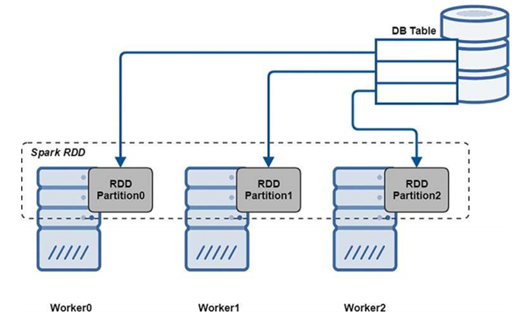
•	Java Database Connectivity (JDBC)

•	read.jdbc()


# 5. Creating RDDs from JSON Files
### read.json()

Syntax: spark.read.json(path, schema=None)

In [6]:
people = spark.read.json("people.json")
# inspect the object created

In [7]:
people
# notice that a DataFrame is created which includes the following schema:

DataFrame[age: bigint, name: string]

In [8]:
# this schema was inferred from the object
people.dtypes
# the dtypes method returns the column names and datatypes in this case it returns:

[('age', 'bigint'), ('name', 'string')]

In [9]:
people.show()
# you should see the following output

+----+-------+
| age|   name|
+----+-------+
|null|Michael|
|  30|   Andy|
|  19| Justin|
+----+-------+



In [10]:
# as with all DataFrames you can create use them to run SQL queries as follows
sqlContext.registerDataFrameAsTable(people, "people")
df2 = spark.sql("SELECT name, age FROM people WHERE age > 20")
df2.show()
# you should see the resultant output below

+----+---+
|name|age|
+----+---+
|Andy| 30|
+----+---+



# 6. Creating an RDD Programmatically

## 6.1. parallelize()
#### Syntax: sc.parallelize(c, numSlices=None)

The parallelize() method assumes that you have a list created already and that you supply it as the c (for collection) argument. The numSlices argument specifies the desired number of partitions to create.

In [11]:
from pyspark.sql import SparkSession
parallelrdd = sc.parallelize([0, 1, 2, 3, 4, 5, 6, 7, 8])
parallelrdd
# notice the type of RDD created:

ParallelCollectionRDD[20] at readRDDFromFile at PythonRDD.scala:274

In [12]:
parallelrdd.count()
# this action will return 9 as this is the number of elements in our 

9

In [13]:
parallelrdd.collect()
# will return the parallel collection as a list as follows:

[0, 1, 2, 3, 4, 5, 6, 7, 8]

## 6.2 range()
#### Syntax: sc.range(start, end=None, step=1, numSlices=None)

The range() method generates a list for you and creates and distributes the RDD. The start, end, and step arguments define the sequence of values, and numSlices specifies the desired number of partitions.

In [14]:
# create an RDD with 1000 integers starting at 0 in increments of 1
# across 2 partitions
range_rdd = sc.range(0, 1000, 1, 2)
range_rdd
# note the PythonRDD type, as range is a native Python function
# PythonRDD[1] at RDD at PythonRDD.scala:43

PythonRDD[23] at RDD at PythonRDD.scala:53

In [15]:
range_rdd.getNumPartitions()# should return 2 as we requested numSlices=2 range_rdd.min()
# should return 0 as this was out start argument

2

In [16]:
range_rdd.max()
# should return 999 as this is 1000 increments of 1 starting from 0

999

In [17]:
range_rdd.take(5)
# should return [0, 1, 2, 3, 4]

[0, 1, 2, 3, 4]

# 7. Operations on RDDs

## 7.1 Transformations, Actions, and Lazy Evaluation

In [18]:
originalrdd = sc.parallelize([0, 1, 2, 3, 4, 5, 6, 7, 8])
newrdd = originalrdd.filter(lambda x: x % 2)

In [19]:
newrdd.collect()

[1, 3, 5, 7]

In [20]:
newrdd.count()

4

## 7.2 RDD Persistence and Reuse

#### Using an RDD for Multiple Actions Without Persistence

In [21]:
numbers = sc.range(0, 1000000, 1, 2)
evens = numbers.filter(lambda x: x % 2)
noelements = evens.count()
# processes evens RDD
print ("There are %s elements in the collection" % (noelements))
# returns "There are 500000 elements in the collection"

There are 500000 elements in the collection


In [22]:
listofelements = evens.collect()
# REPROCESSES evens RDD
print ("The first five elements include " + (str(listofelements[0:5])))
# returns "The first five elements include [1, 3, 5, 7, 9]"

The first five elements include [1, 3, 5, 7, 9]


#### Using an RDD for Multiple Actions with Persistence

In [23]:
numbers = sc.range(0, 1000000, 1, 2)
evens = numbers.filter(lambda x: x % 2)
evens.persist()
# instructs Spark to persist evens RDD when the next action requires it
noelements = evens.count()
# processes and persists evens RDD in memory
print ("There are %s elements in the collection" % (noelements))
# returns "There are 500000 elements in the collection"

There are 500000 elements in the collection


In [24]:
listofelements = evens.collect()
# does NOT have to recompute the evens RDD
print ("The first five elements include " + (str(listofelements[0:5])))
# returns "The first five elements include [1, 3, 5, 7, 9]"

The first five elements include [1, 3, 5, 7, 9]
